### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### Importing Database

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Shape of Neflix Dataset

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Checking for Duplicates 

In [6]:
df.duplicated().sum()

0

# Data Cleaning

### Checking the Null values

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
null_count = df.isnull().sum()
total_rows = len(df)
null_percentage = round(((null_count / total_rows) * 100),2)
null_percentage_df = pd.DataFrame({"Column Name" : null_percentage.index, "Null_Percentage" : null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by = 'Null_Percentage', ascending = False)
null_percentage_df

,Column Name,Null_Percentage
3,director,29.91
5,country,9.44
4,cast,9.37
6,date_added,0.11
8,rating,0.05
9,duration,0.03
0,show_id,0.00
1,type,0.00
2,title,0.00
7,release_year,0.00


### Formatting Date

In [9]:
# Converting "date_added" to datetime format

df["date_added"] = pd.to_datetime(df['date_added'], format = 'mixed')

# Extracting "day_added", "year_added", "month_added" 

df['day_added'] = df['date_added'].dt.day_name()
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [10]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021.0,9.0


In [11]:
# Replace non-finite values (NaN or inf) with a default value (0)

df[['year_added', 'month_added']] = df[['year_added', 'month_added']].fillna(0).astype(int)

# Converting the values in Year_added, and month_added column to int

df['year_added'] = df['year_added'].astype(int)
df['month_added'] = df['month_added'].astype(int)

### Dropping the Unnecessary Columns

In [12]:
df.drop(columns = ['show_id', 'description'], inplace=True)

### Filling Values in Country column

In [13]:
# Split the comma separated values in column "country"

df2 = df.copy()
df2['country'] = df2['country'].str.split(', ')
df3 = df2.explode('country')

# Calculating the count of movies directed by each director in each country

df4 = df3.groupby(['director', 'country']).size().to_frame(name='count')
max_indices = df4.groupby('director')['count'].idxmax()

# Find the country with the maximum count for each director, and creates a new DataFrame "max_rows"

max_rows = df4.loc[max_indices].reset_index()

In [14]:
# Merge df2 and the max_rows DataFrame based on the 'director' column. 

merge_df = pd.merge(df2, max_rows, how = 'left', on = 'director')

# Fill missing values in the 'country_x' column of merge_df with values from the 'country_y' column.

merge_df = merge_df.fillna({'country_x' : merge_df['country_y']})

# Updates the 'country' column in the original DataFrame df

df['country'] = merge_df['country_x']

In [15]:
df.country.isnull().sum()

683

##### Result: Managed to fill 148 (831 - 683) null values in Country column

### Handling null values

In [16]:
# Replacing null values in Director, Cast, Country, Rating, Day_added  

df.fillna({'director': "Unknown Director", 
           'cast': "Unknown Cast",
           'country': "Unknown Country", 
           'rating': "Unknown Rating", 
           'day_added': "Unknown Day"}, inplace=True)

In [17]:
# Replacing null values in "Duration" column

df[df['duration'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,day_added,year_added,month_added
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,[United States],2017-04-04,2017,74 min,NaN,Movies,Tuesday,2017,4
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,[United States],2016-09-16,2010,84 min,NaN,Movies,Friday,2016,9
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,[United States],2016-08-15,2015,66 min,NaN,Movies,Monday,2016,8


##### It seems the missing values for duration are incorrectly recorded in rating column

In [18]:
# Correcting the error

df['duration'] = df['duration'].fillna(df['rating'])

In [19]:
# Correcting the rating column

# Calculating the most common rating for Movies

df.groupby('type')['rating'].value_counts(ascending=False).head(1)

# Replacing the incorrect values with most common rating

df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})

In [20]:
df.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
day_added        0
year_added       0
month_added      0
dtype: int64

### Create Final DataFrame for Analysis

In [21]:
# Split the comma separated values in column "director". Keeping "title" as key

df2 = df[['title', 'director']].copy()
df2['director'] = df2['director'].str.split(', ')
df2 = df2.explode('director')

# Split the comma separated values in column "country". Keeping "title" as key

df3 = df[['title', 'country']].copy()
df3 = df3.explode('country')

merge_df = pd.merge(df2, df3, on = 'title') # Merging 'director' & 'country' 

# Split the comma separated values in column "cast". Keeping "title" as key

df4 = df[['title', 'cast']].copy()
df4['cast'] = df4['cast'].str.split(', ')
df4 = df4.explode('cast')

merge_df2 = pd.merge(merge_df, df4, on = 'title') # Merging 'director' & 'country' & 'cast'

# Split the comma separated values in column "listed_in". Keeping "title" as key

df5 = df[['title', 'listed_in']].copy()
df5['listed_in'] = df5['listed_in'].str.split(', ')
df5 = df5.explode('listed_in')

merge_df3 = pd.merge(merge_df2, df5, on = 'title') # Merging 'director' & 'country' & 'cast' & 'listed_in'

# Final DataFrame

df_final = pd.merge(merge_df3, df, on = 'title', how = 'left') # Merging to get rest of the columns

In [22]:
df_final.head(2)

,title,director_x,country_x,cast_x,listed_in_x,type,director_y,cast_y,country_y,date_added,release_year,rating,duration,listed_in_y,day_added,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,United States,Unknown Cast,Documentaries,Movie,Kirsten Johnson,Unknown Cast,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,Saturday,2021,9
1,Blood & Water,Unknown Director,South Africa,Ama Qamata,International TV Shows,TV Show,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Friday,2021,9


In [23]:
# Dropping the columns

df_final.drop(columns = ['director_y', 'cast_y', 'country_y', 'listed_in_y'], inplace=True)

# Renaming the columns

df_final.rename(columns={'director_x': 'director', 
                         'cast_x': 'cast', 
                         'country_x': 'country',
                         'listed_in_x': 'genre'}, inplace=True)

In [24]:
df_final.head(2)

,title,director,country,cast,genre,type,date_added,release_year,rating,duration,day_added,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,United States,Unknown Cast,Documentaries,Movie,2021-09-25,2020,PG-13,90 min,Saturday,2021,9
1,Blood & Water,Unknown Director,South Africa,Ama Qamata,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,Friday,2021,9


# The Analysis

### 1) Analysing Type of Content on Netflix

In [27]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

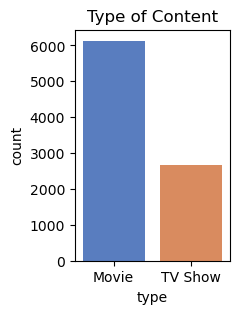

In [28]:
sns.set_palette("muted")
plt.figure(figsize = (2, 3))
sns.countplot(x = df['type'], data = df)
plt.title('Type of Content')
plt.show()

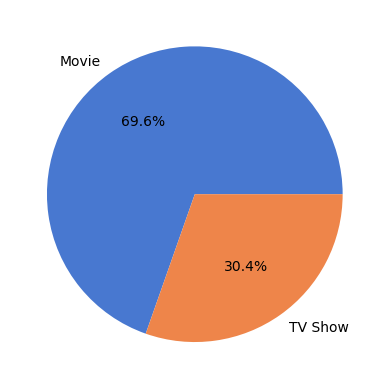

In [31]:
plt.pie(x = df["type"].value_counts(), labels = df["type"].value_counts().index, autopct='%1.1f%%')
plt.show()

##### Almost 70% of Netflix's content is Movies

### 2) Analysing Duration of Movies/ TV shows

In [33]:
# Converting Duration Column to integer

df['duration'] = df['duration'].str.strip(' min')
df['duration'] = df['duration'].str.strip(' Seasons')
df['duration'] = df['duration'].astype(int)

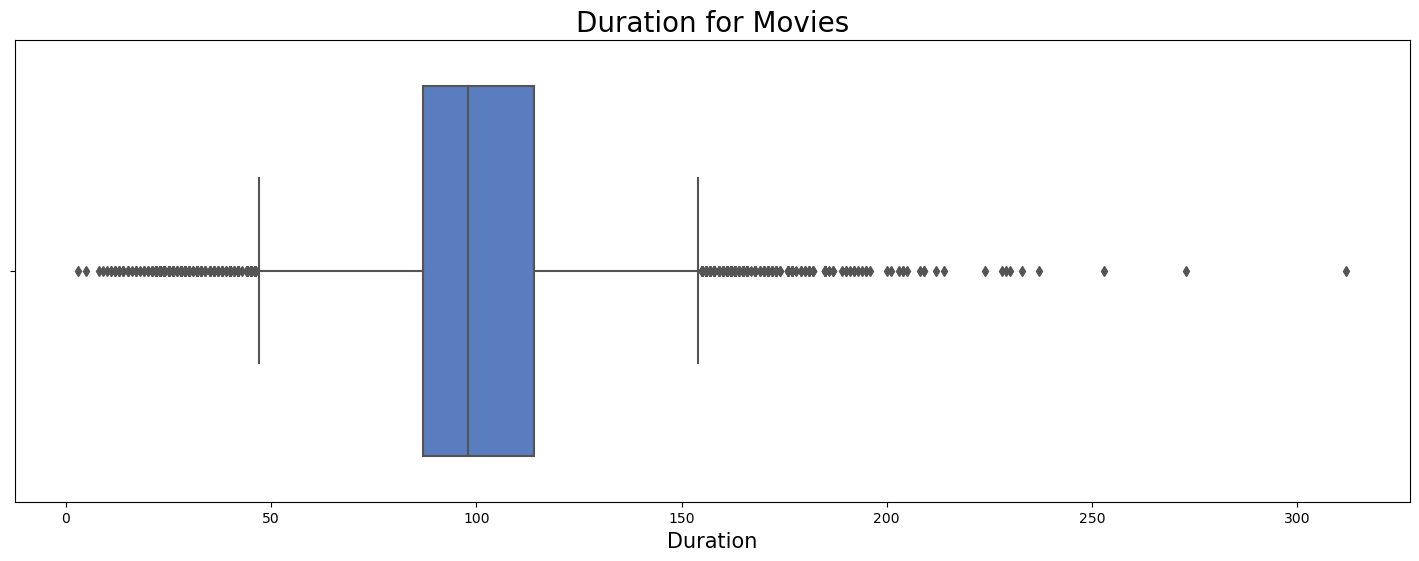

In [35]:
# Boxplot will help determine most common range duration for Movies released on Netflix

movies_df = df[df['type'] == 'Movie']
sns.set_palette("muted")
plt.figure(figsize = (18, 6))
sns.boxplot(x=movies_df['duration'])
plt.xlabel('Duration', fontsize=15)
plt.ylabel('')
plt.title('Duration for Movies', fontsize=20)
plt.show()

In [37]:
movies_df['duration'].describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

##### Most common range of duration for Movies is from 90 mins to 120 mins 

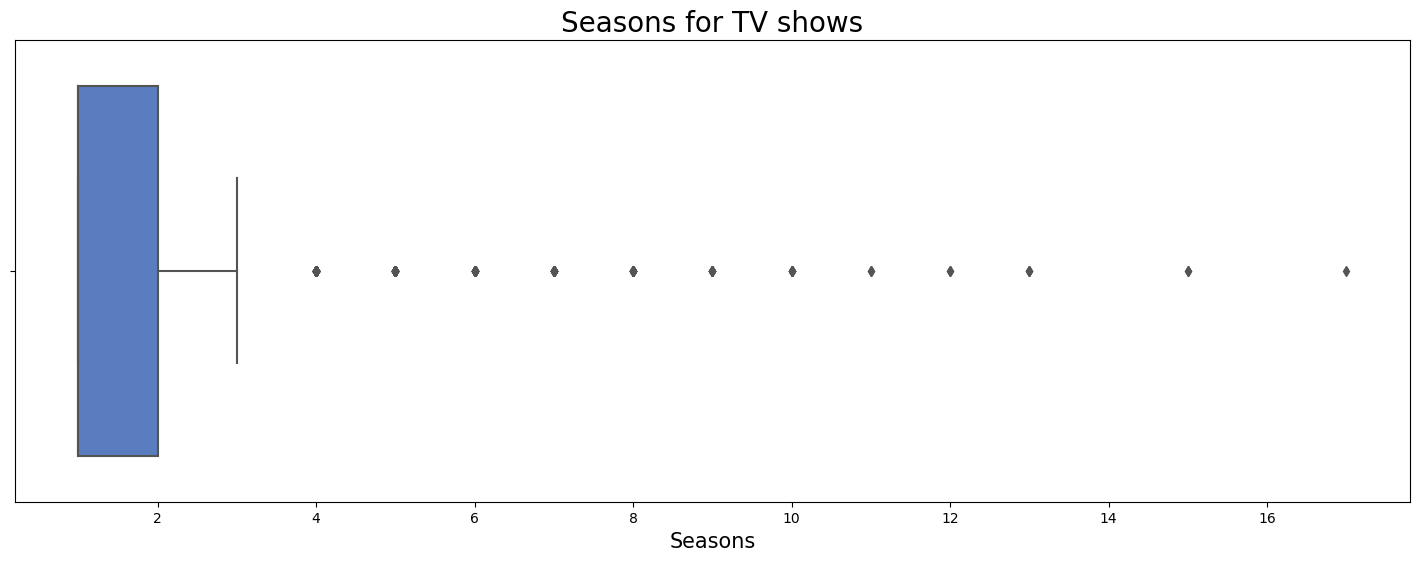

In [42]:
# Boxplot will help determine most common range of seasons for TV shows released on Netflix

tv_df = df[df['type'] != 'Movie']
sns.set_palette("muted")
plt.figure(figsize = (18, 6))
sns.boxplot(x = tv_df['duration'])
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('')
plt.title('Seasons for TV shows', fontsize=20)
plt.show()

In [41]:
tv_df['duration'].describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

##### Most TV shows on Netflix run from 1 to 2 seasons 

### 3) Analysing Rating of Content

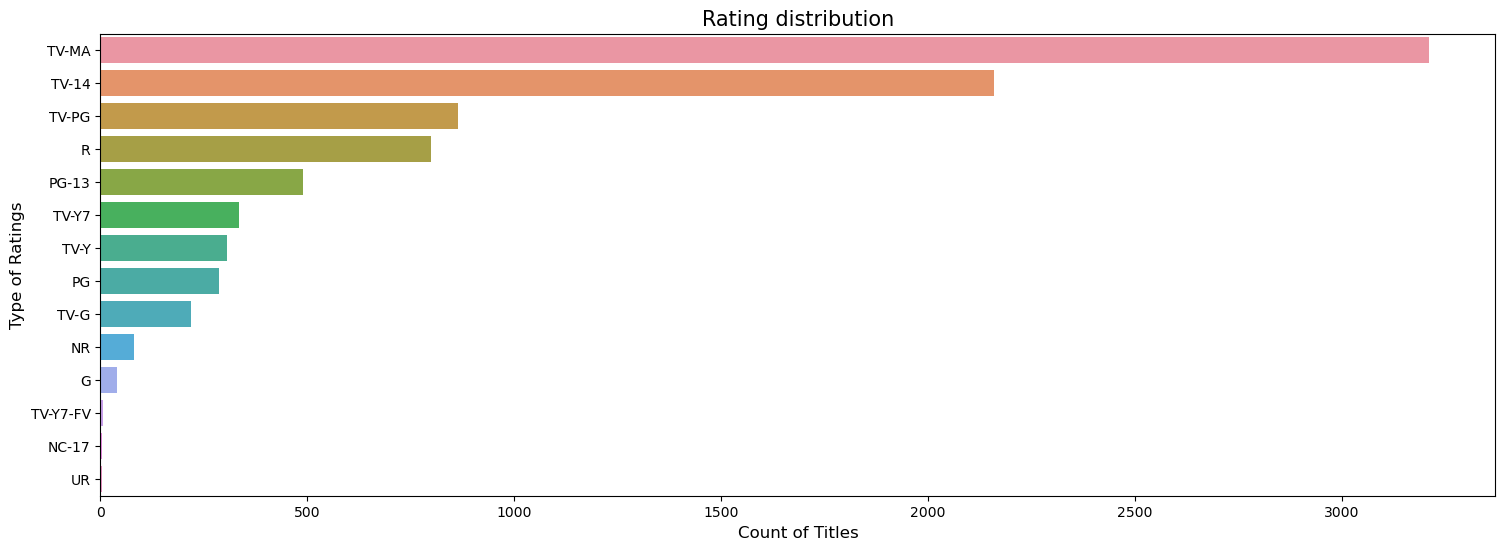

In [46]:
df2 = df[df['rating'] != 'Unknown Rating'] # Excluding the Unknown rating for analysis

# Using Count plot to plot number of content for each type rating

plt.figure(figsize = (18, 6))
order = df2['rating'].value_counts().index
sns.countplot(data = df2, y = 'rating', order=order )
plt.title('Rating distribution', fontsize=15)
plt.xlabel('Count of Titles', fontsize=12)
plt.ylabel('Type of Ratings', fontsize=12)
plt.show()

In [47]:
df2['rating'].nunique()

14

##### Out of 14 different types of ratings the most common maturity rating are TV-MA and TV-14.
##### Its can be concluded that Netflix focus on mature target audience.

#### Top 10 Actors for TV-MA rating

In [102]:
df_final2 = df_final[df_final['cast'] != 'Unknown Cast']
df_final2 = df_final2[df_final2['rating'] == 'TV-MA']

df_final2 = df_final2.groupby(['cast'])['title'].nunique().sort_values(ascending=False)[:10:]
df_final2.reset_index()

,cast,title
0,Takahiro Sakurai,17
1,Yuki Kaji,14
2,Robb Wells,13
3,John Paul Tremblay,12
4,Adil Hussain,11
5,Jun Fukuyama,11
6,Ramsey Nouah,11
7,Tiffany Haddish,10
8,Seema Biswas,10
9,Eric Idle,10


#### Top 10 Directors for TV-MA rating

In [100]:
df_final3 = df_final[df_final['director'] != 'Unknown Director']
df_final3 = df_final3[df_final3['rating'] == 'TV-MA']
df_final3 = df_final3.groupby(['director'])['title'].nunique().sort_values(ascending=False)[:10:]
df_final3.reset_index()

,director,title
0,Jan Suter,20
1,Raúl Campos,18
2,Marcus Raboy,13
3,Jay Karas,11
4,Jay Chapman,10
5,Shannon Hartman,8
6,Lance Bangs,7
7,Anurag Kashyap,7
8,Youssef Chahine,7
9,Ryan Polito,7


### 4) Changed in number of Movies/ TV shows over the year

In [49]:
df2 = df.copy()
df2 = df2[df2['year_added'] != 0] # Dropping the unknown rows

movies_year_df = df2[df2['type'] == 'Movie']
tv_year_df = df2[df2['type'] == 'TV Show']

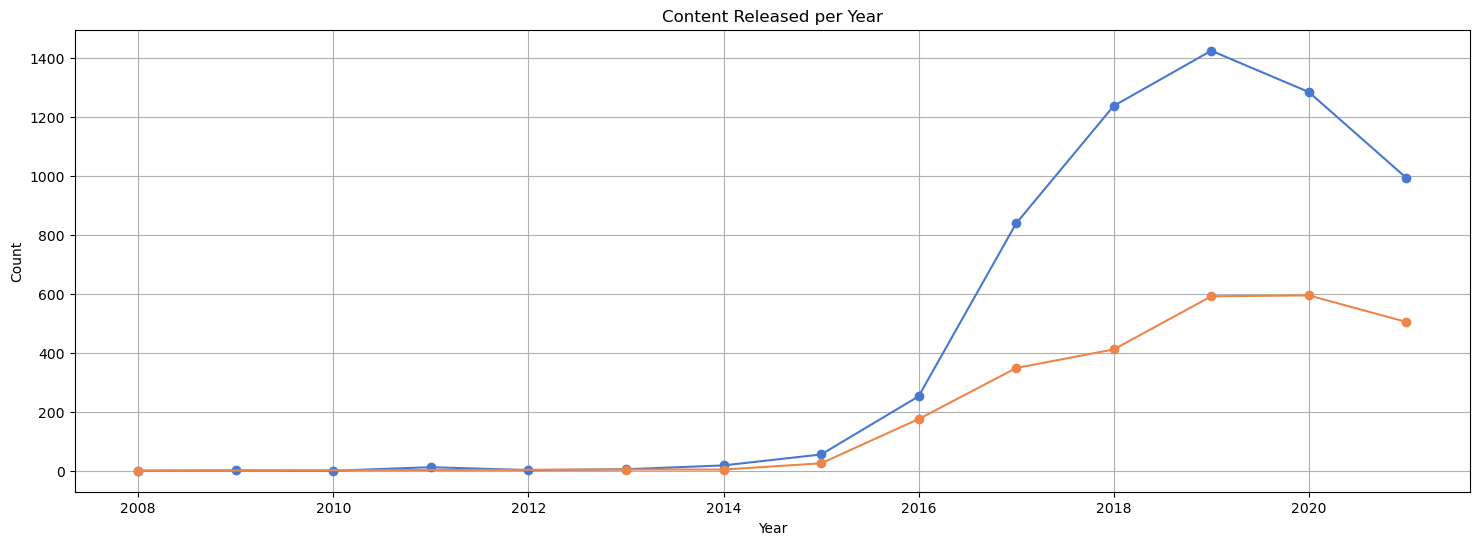

In [52]:
movies_per_year = movies_year_df.groupby('year_added').size()
tv_per_year = tv_year_df.groupby('year_added').size()

plt.figure(figsize=(18, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.plot(tv_per_year.index, tv_per_year.values, marker='o')
plt.xlabel('Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content Released per Year')
plt.grid(True)

plt.show()

### 5) Analysing content as per countries

In [53]:
# Top 10 Countries

country_df = df_final.groupby('country')['title'].nunique().sort_values(ascending=False).to_frame().reset_index()
country_df['title'] = country_df['title'].astype(int)
country_df['country'] = country_df['country'].astype(str)
country_df = country_df[country_df['country'] != 'Unknown Country']
country_df = country_df.head(10)
country_df

,country,title
0,United States,3718
1,India,1102
2,United Kingdom,809
4,Canada,450
5,France,395
6,Japan,326
7,South Korea,233
8,Spain,233
9,Germany,227
10,Mexico,172


#### Distribution of movies and TV shows for top 10 countries

In [60]:
country_df2 = df[['title', 'country', 'type']].copy()
country_df2 = country_df2.explode('country')
country_df2 = country_df2[country_df2['country'] != 'Unknown Country']
top_country = country_df2['country'].value_counts().index[:10]
top_country_df = country_df2.loc[country_df2['country'].isin(top_country)]

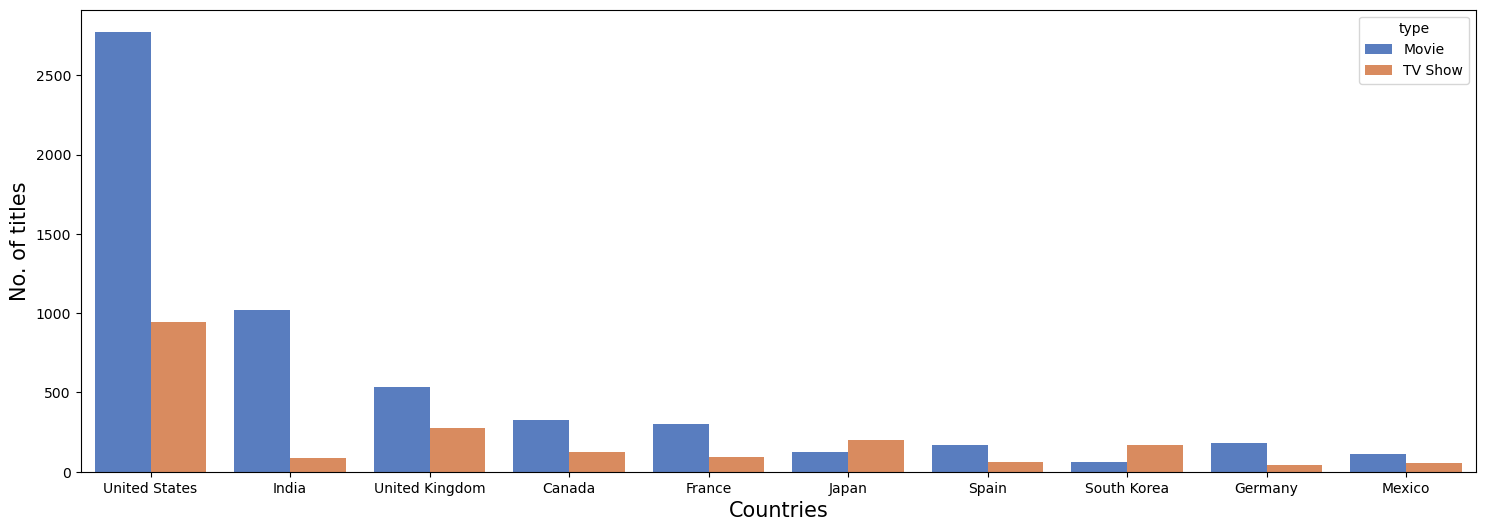

In [63]:
order = top_country_df['country'].value_counts().index
sns.set_palette("muted")
plt.figure(figsize = (18, 6))
sns.countplot(data = top_country_df, x = 'country', hue = 'type', order =order )
plt.xlabel('Countries', fontsize=15)
plt.ylabel('No. of titles', fontsize=15)
plt.show()

##### Currently India ranks 2nd on total content released yet no. of TV show produced is significantly low

### 6) Analysing Genre Distribution

In [71]:
genres_df = df_final.groupby('genre')['title'].nunique().sort_values(ascending=False).to_frame().reset_index()
genres_df['title'] = genres_df['title'].astype(int)
genres_df['genre'] = genres_df['genre'].astype(str)
genres_df2 = genres_df.copy()
genres_df2['Contribution'] = round((genres_df['title']/len(df) * 100),2)
genres_df2[::]

,genre,title,Contribution
0,International Movies,2752,31.25
1,Dramas,2427,27.56
2,Comedies,1674,19.01
3,International TV Shows,1351,15.34
4,Documentaries,869,9.87
5,Action & Adventure,859,9.75
6,TV Dramas,763,8.66
7,Independent Movies,756,8.58
8,Children & Family Movies,641,7.28
9,Romantic Movies,616,6.99


##### Out of 42 unique genres; International Movies, Dramas and Comedies are most popular on Neflix with a contribution of more than 77%

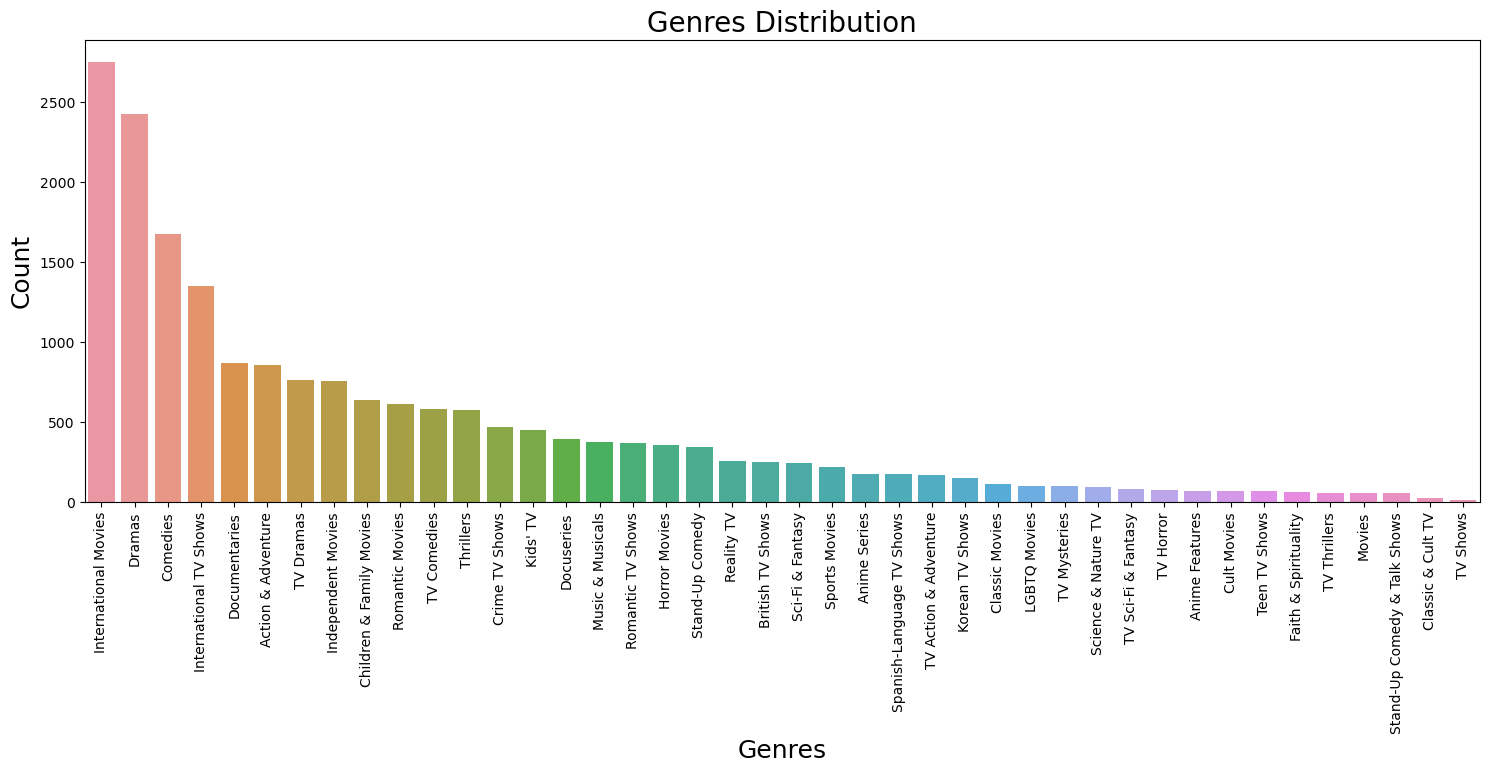

In [72]:
# Plotting different genres

sns.set_palette("muted")
plt.figure(figsize = (18, 6))
sns.barplot(x= genres_df['genre'], y=genres_df['title'], data = genres_df)
plt.title('Genres Distribution', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

#### Top Director across popular genres

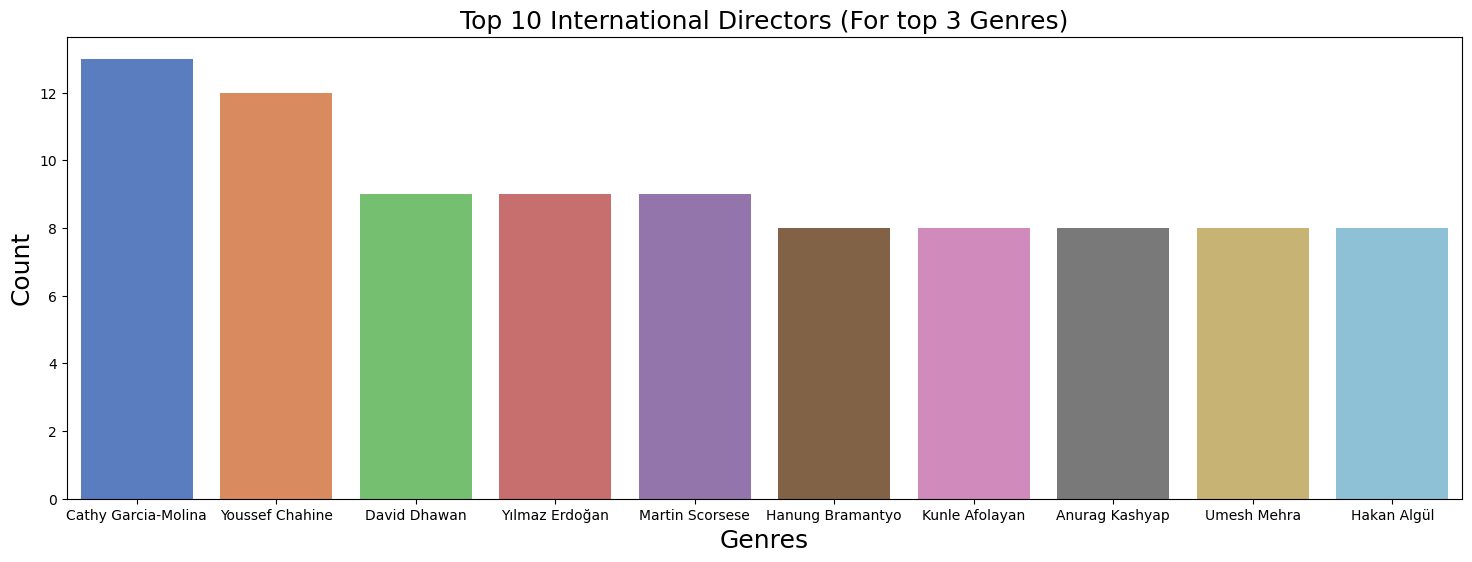

In [93]:
genre_director_df = df_final.copy()

top_genre = genre_director_df['genre'].value_counts().index[:3]
genre_director_df = genre_director_df.loc[genre_director_df['genre'].isin(top_genre)]

genre_director_df2 = genre_director_df.groupby('director')['title'].nunique().sort_values(ascending=False)[1:11:]

genre_director_df2 = genre_director_df2.reset_index()

sns.set_palette("muted")
plt.figure(figsize = (18, 6))
sns.barplot(x= genre_director_df2['director'], y=genre_director_df2['title'], data = genre_director_df2)
plt.title('Top 10 International Directors (For top 3 Genres)', fontsize=18)
plt.xticks(fontsize=10)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

In [94]:
from wordcloud import WordCloud

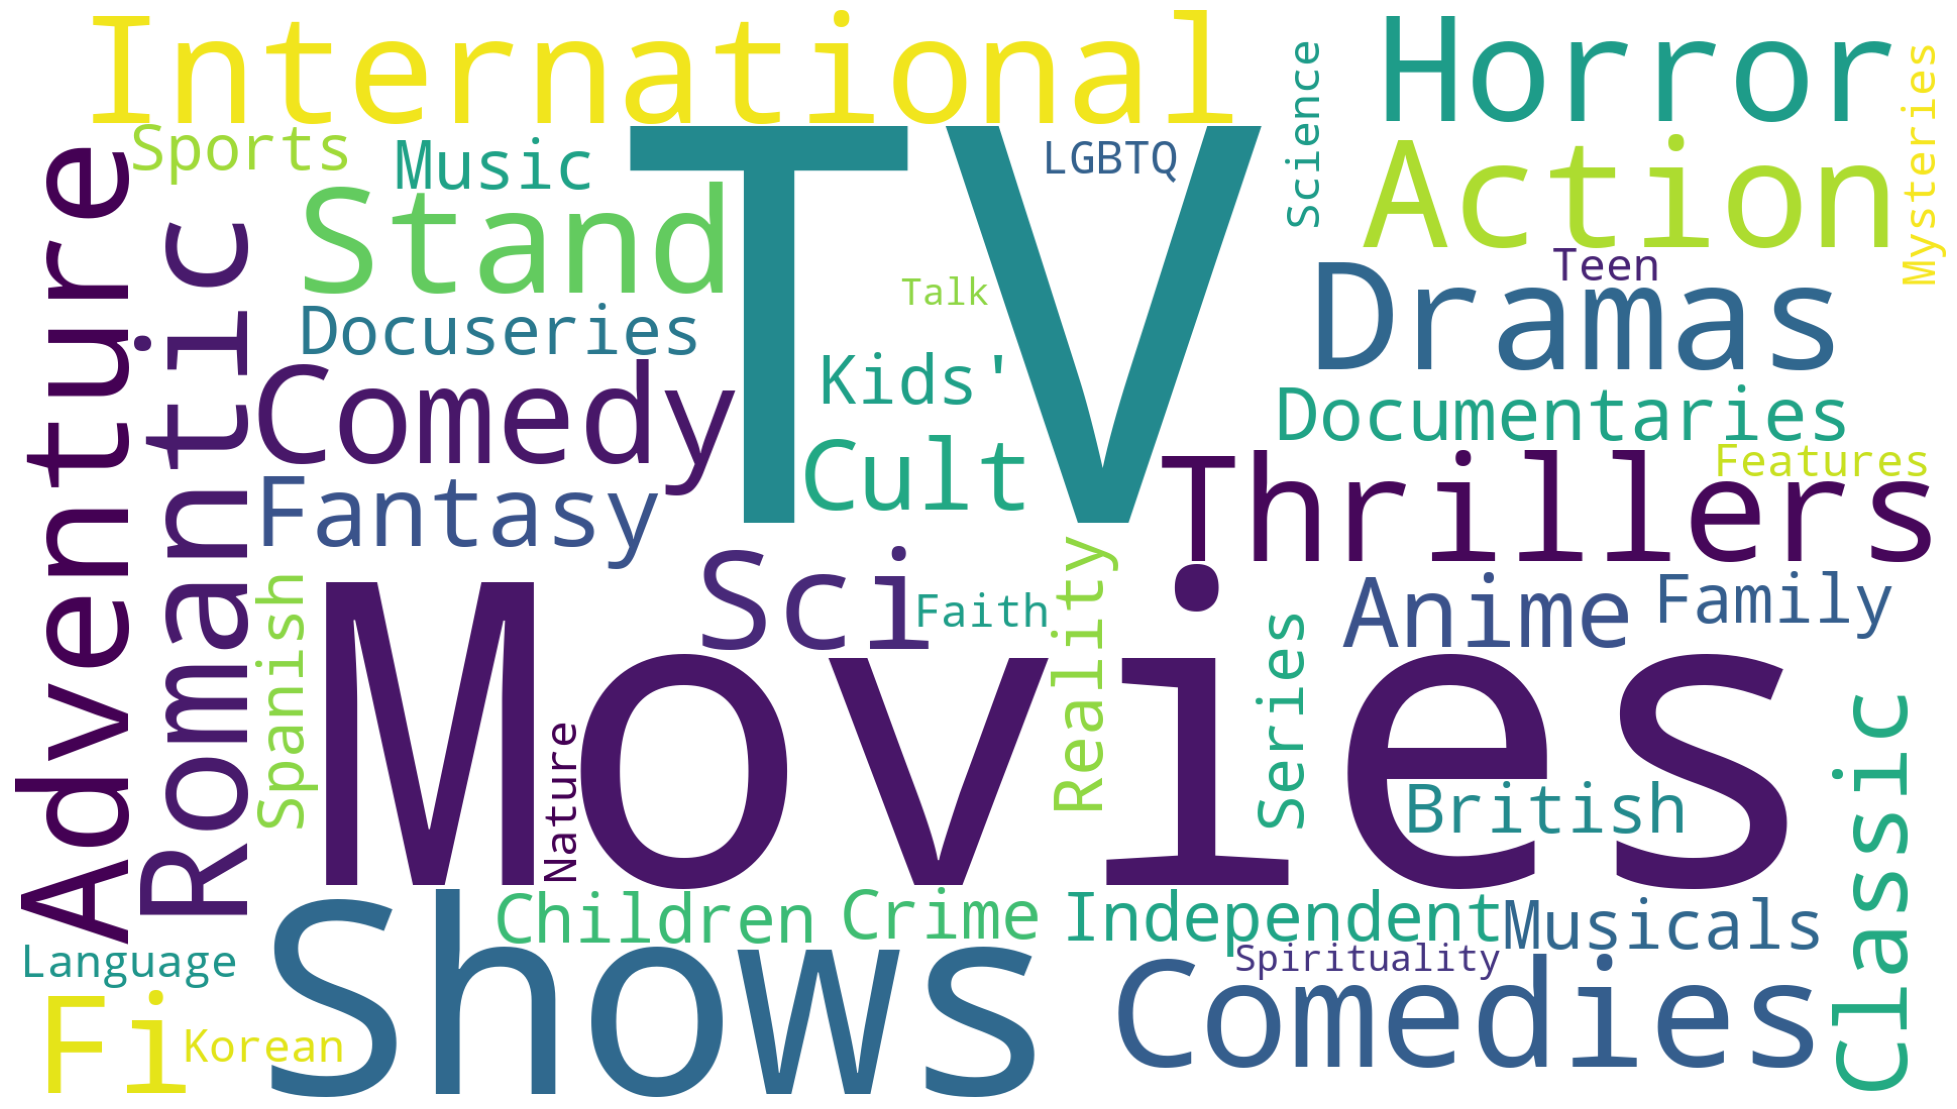

In [97]:
x = genres_df['genre'].astype(str).str.cat(sep=', ')

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(x)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 7) Analysing release of content on Netflix

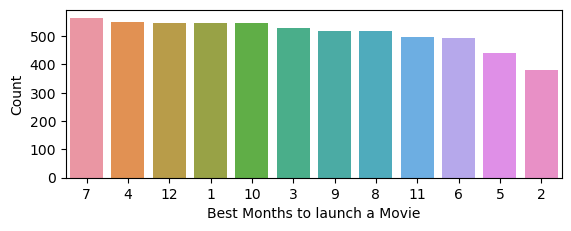

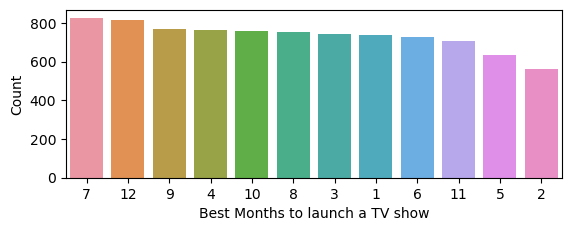

In [112]:
# Best Months to release Movie/ TV show

movie_df2 = df[df['type'] == 'Movie']
tv_show_df2 = df[df['type'] == 'TV Show']
tv_show_df2 = df[df['month_added'] != 0]

plt.subplot(2,1,1)
sns.set_palette("muted")
order = movie_df2['month_added'].value_counts().index
sns.countplot(x = 'month_added', data = movie_df2, order=order)
plt.xlabel('Best Months to launch a Movie', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

plt.subplot(2,1,1)
order = tv_show_df2['month_added'].value_counts().index
sns.countplot(x = 'month_added', data = tv_show_df2, order=order)
plt.xlabel('Best Months to launch a TV show', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

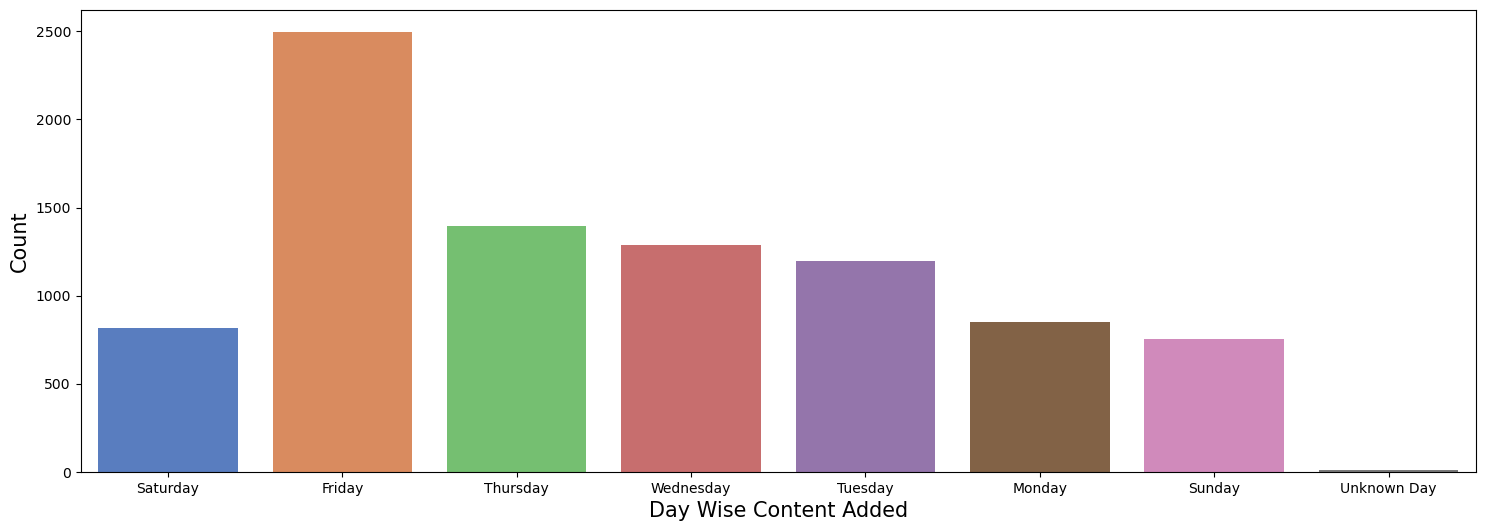

In [113]:
# Popular Day of the Week to release Content

sns.set_palette("muted")
plt.figure(figsize = (18, 6))
sns.countplot(x = 'day_added', data = df)
plt.xlabel('Day Wise Content Added', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

#### After how many days the movie will be added to Netflix after the release of the movie

In [115]:
release_df = df

release_df['date_added'] = pd.to_datetime(release_df['date_added'])
release_df['release_year'] = pd.to_datetime(release_df['release_year'], format='%Y')

release_df['days_to_add'] = (release_df['date_added'] - release_df['release_year']).dt.days
days_to_add = release_df['days_to_add'].mode()[0]

print(f"After {days_to_add} days from release the content will be added to Netflix.")

After 334.0 days from release the content will be added to Netflix.
